### Research Question 1
<p><b>What is the exact demographic most at risk for covid19 in Toronto?</b></p> 
To find this we'll need to produce graphs of Age, Gender, and if they were hospitalized. 


In [16]:
import pandas as pd
import numpy as np
import pandas_profiling
import sys, os
sys.path.insert(0, os.path.abspath('..'))
from scripts import project_functions as sc
path = "D:\\Work\\DATA301\\course-project-group_6022\\data\\raw\\COVID19 cases Toronto.csv"#"C:\\Users\\matta\\Documents\\UBCO 20-21\\Data 301\\course-project-group_6022\\data\\raw\\COVID19 cases Toronto.csv" 
#this formats everything quickly. 
df = sc.ez_format(path)
df

,Age_Group,Source_of_Infection,Episode_Date,Reported_Date,Gender,Outcome,Ever_Hospitalized,Ever_in_ICU,Days_Since
0,50-59,Travel,2020-01-21,2020-01-23,MALE,Yes,No,No,0
1,50-59,Travel,2020-01-22,2020-01-23,FEMALE,No,No,No,0
2,20-29,Travel,2020-02-05,2020-02-21,FEMALE,No,No,No,29
3,50-59,N/A - Outbreak associated,2020-02-07,2020-04-13,MALE,No,No,No,81
4,70-79,Travel,2020-02-14,2020-03-01,FEMALE,No,No,No,38
...,...,...,...,...,...,...,...,...,...
13212,60-69,Close contact,2020-07-12,2020-06-28,FEMALE,No,No,No,157
13213,<19,Close contact,2020-07-12,2020-07-12,FEMALE,No,No,No,171
13214,30-39,Close contact,2020-07-12,2020-07-12,MALE,No,No,No,171
13215,30-39,Travel,2020-07-12,2020-07-12,MALE,No,No,No,171


In [17]:
#create a new data frame of values we care about
ndf = df.groupby(["Gender", "Age_Group", "Ever_Hospitalized"]).size().reset_index()
ndf = ndf.rename(columns  = {0:'D_Count'})
ndf = ndf.sort_values(by = 'D_Count', ascending = False)
#drop those who were not hosplitalized, and then drop the hopitalized column. 
ndf = ndf.loc[ndf["Ever_Hospitalized"].str.contains("Yes")]
ndf = ndf.drop(["Ever_Hospitalized"], axis = 1)
ndf = ndf.loc[~df["Gender"].str.contains("UNKNOWN")]
#create a demographic column, combine gender and agegroup together
ndf.insert( 2,column = 'Demographic', value = (ndf['Gender'][:] + " " + ndf['Age_Group'][:]))
order = ndf['Demographic'].to_list()
ndf = ndf.reset_index(drop = True)
ndf

,Gender,Age_Group,Demographic,D_Count
0,MALE,60-69,MALE 60-69,67
1,MALE,70-79,MALE 70-79,57
2,MALE,50-59,MALE 50-59,53
3,FEMALE,60-69,FEMALE 60-69,34
4,FEMALE,50-59,FEMALE 50-59,31
5,FEMALE,70-79,FEMALE 70-79,26
6,MALE,40-49,MALE 40-49,25
7,FEMALE,80-89,FEMALE 80-89,24
8,MALE,80-89,MALE 80-89,14
9,FEMALE,40-49,FEMALE 40-49,10


Text(0.5, 0, 'Amount of Cases resulting in Hospitalization')

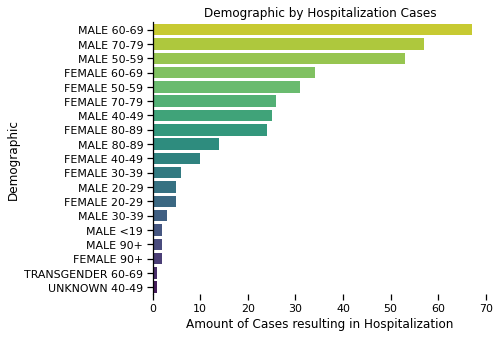

In [18]:
import seaborn as sns
from matplotlib import pyplot as plt
plt.figure(figsize=(6,5))
sns.set_context("notebook")
sns.barplot(x ='D_Count', y = 'Demographic', data= ndf, order= order, palette = 'viridis_r')
sns.despine(top = True, right = True, left = False, bottom = True)
plt.title("Demographic by Hospitalization Cases")
plt.xlabel("Amount of Cases resulting in Hospitalization")

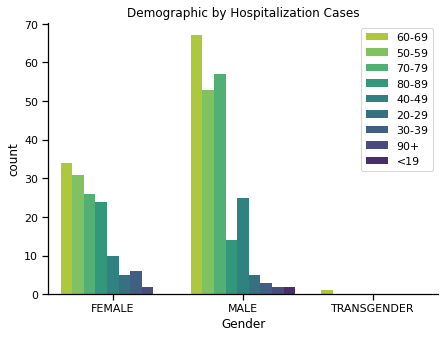

In [19]:
#quickly draw up a new dataframe. 
df = sc.ez_format(path)
df = df.loc[df["Ever_Hospitalized"].str.contains("Yes")]
df = df.loc[~df["Gender"].str.contains("UNKNOWN")]
df = df.reset_index(drop = True)
ls = df['Age_Group'].value_counts().to_dict()
plt.figure(figsize=(7,5))
"""
Use the seaborn count plot to visualize our data. Personally, graph 1 is easier to look at than graph 2,
but I also want to go for style points. 
"""
sns.countplot(x= 'Gender', hue = "Age_Group", data=df, hue_order = ls, dodge = True, palette = 'viridis_r' )
sns.despine(top = True, right = True, left = False)
plt.title("Demographic by Hospitalization Cases")
plt.xlabel("Gender")
plt.legend(loc='upper right')



### Result
By our graph we can see that senior males are most succeptable to the virus. This is intriuging becase our data set actually has 
more females than males. My initial hypothesis was that the most succeptable demographic would be female, since there was over 1000 more female cases.
Here's the image of that graph that from EDA_MattKuelker.ipynb. (If you still can't find it, it's in output.png here) 

![plot showing females as largest demographic](output.png "image")

Not only that, but it apears that across the board, elderly men are most at risk for the virus, despite being a less prominent group in the data set. 
As for those least affected, 90+ is to be expected, since most people don't live that long. I am surpised that there was a trangender case that was hospitalized, considering that there are not that many trans people compared to cis gendered people. 

From this data set we can also guess that females <19 are the least to be affected. Not only are there few hospitializations, but also their male <19 counterparts are also at the bottom of the case count. 

### Research Question 2
<p><b>Do women have a higher spread via physical contact than men? </b></p> 
<i>Women are scientifically proven to have closer relationships than males. Let's see if we can draw a correllation between physical contact and cases for gender. </i>

How are we going to prove this? Well first to visualize our data lets draw up a countplot via gender, than see if we can draw a correllation. 

In [93]:
import pandas as pd
import numpy as np
import pandas_profiling
import sys, os
import seaborn as sns
from matplotlib import pyplot as plt
sys.path.insert(0, os.path.abspath('..'))
from scripts import project_functions as sc
path ="C:\\Users\\matta\\Documents\\UBCO 20-21\\Data 301\\course-project-group_6022\\data\\raw\\COVID19 cases Toronto.csv"  #"D:\\Work\\DATA301\\course-project-group_6022\\data\\raw\\COVID19 cases Toronto.csv"
#this formats everything quickly. 
df = sc.ez_format(path)

df.head(5)


,Age_Group,Source_of_Infection,Episode_Date,Reported_Date,Gender,Outcome,Ever_Hospitalized,Ever_in_ICU,Days_Since
0,50-59,Travel,2020-01-21,2020-01-23,MALE,Yes,No,No,0
1,50-59,Travel,2020-01-22,2020-01-23,FEMALE,No,No,No,0
2,20-29,Travel,2020-02-05,2020-02-21,FEMALE,No,No,No,29
3,50-59,N/A - Outbreak associated,2020-02-07,2020-04-13,MALE,No,No,No,81
4,70-79,Travel,2020-02-14,2020-03-01,FEMALE,No,No,No,38


We're going to be filtering out pending, unkown, and N/A / outbreak associated, since those do not directly tell us how exactly people got covid 19. We'll also only focus on males and females since there isn't enough transgender cases to add draw any meaningful conclusions. 

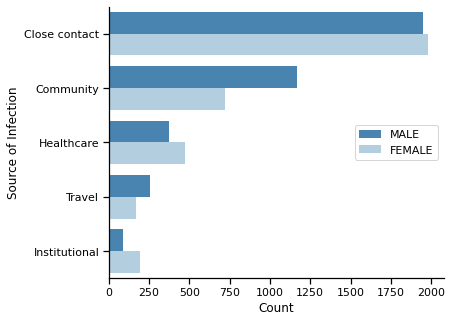

In [107]:

df = df[~df['Source_of_Infection'].isin(['N/A - Outbreak associated','Pending','Unknown/Missing'])]
df = df.loc[df["Gender"].str.contains("MALE")] #We're dropping all other genders and whatnots from the dataset beccause they are minscule in count. 
ls = df['Source_of_Infection'].value_counts().to_dict()
plt.figure(figsize=(6,5))
sns.set_context("notebook")
sns.countplot(y = "Source_of_Infection", data =df, order = ls, hue = "Gender", palette = "Blues_r")
plt.legend(loc = "center right")
plt.ylabel("Source of Infection")
plt.xlabel("Count")
sns.despine()

Look at this! After some decent filtering it turns out my hypothesis is completely wrong, and the most notable desparity between male and female is actually community contact. Turns out the demographic with the highest infection count in community contact was male. 

Let's modify our question then and ask ourselves what the age demographic is of males who were infected via community contact. My guess is bachelor men in their 20's and seniors in elderly homes, since we had proven in our research question above older men were most at risk for the virus. 

<p><b>New Question: What is the demographic of these males infected in community? </b></p> 

Time for some filtering. 

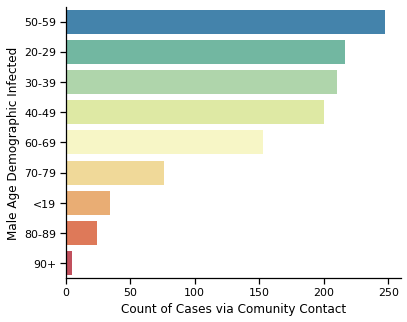

In [109]:
df = sc.ez_format(path)
df = df.loc[df["Gender"].str.contains("MALE")] #This almost got me. Always anything containing male will be kept.... which means we'd still have females in our dataset. 
df = df.loc[~df["Gender"].str.contains("FEMALE")] 
df = df.loc[df["Source_of_Infection"].str.contains("Community")]
df
ls = df['Age_Group'].value_counts().to_dict()
plt.figure(figsize=(6,5))
sns.set_context("notebook")
sns.countplot(y = "Age_Group", data = df, order = ls, palette = "Spectral_r")
plt.ylabel("Male Age Demographic Infected")
plt.xlabel("Count of Cases via Comunity Contact")
sns.despine()
